<a href="https://colab.research.google.com/github/Sayandeep27/Statistics/blob/main/Titanic_data_hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)


In [2]:
# Check for missing values
df.isnull().sum()

# Fill missing values for 'Age' with the mean age
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Drop rows with missing values in 'Embarked'
df.dropna(subset=['Embarked'], inplace=True)

# Convert categorical variables into numerical
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2


In [4]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


In [5]:
df.describe()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.350956,29.653446,0.524184,0.382452,32.096681,1.535433,1.906637
std,256.998173,0.486260,0.834700,0.477538,12.968366,1.103705,0.806761,49.697504,0.792088,1.614703
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,224.000000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000,1.000000
50%,446.000000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,2.000000,1.000000
75%,668.000000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,11.000000


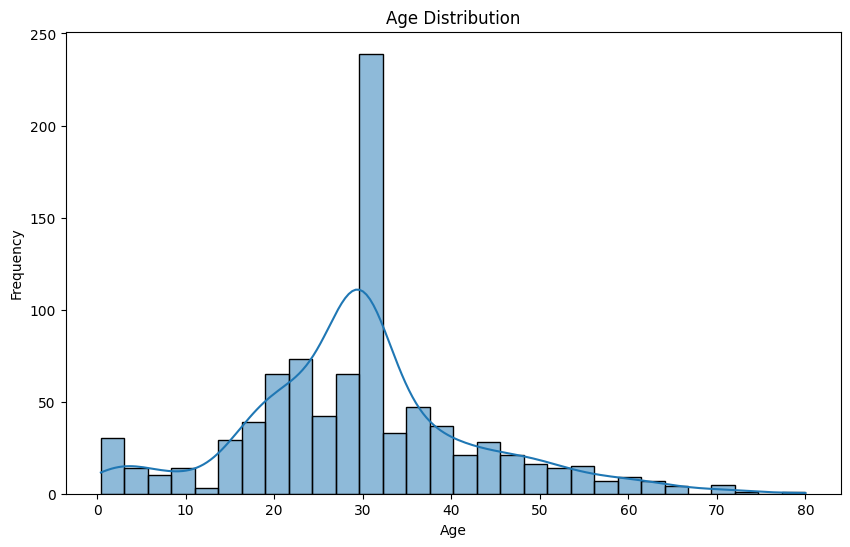

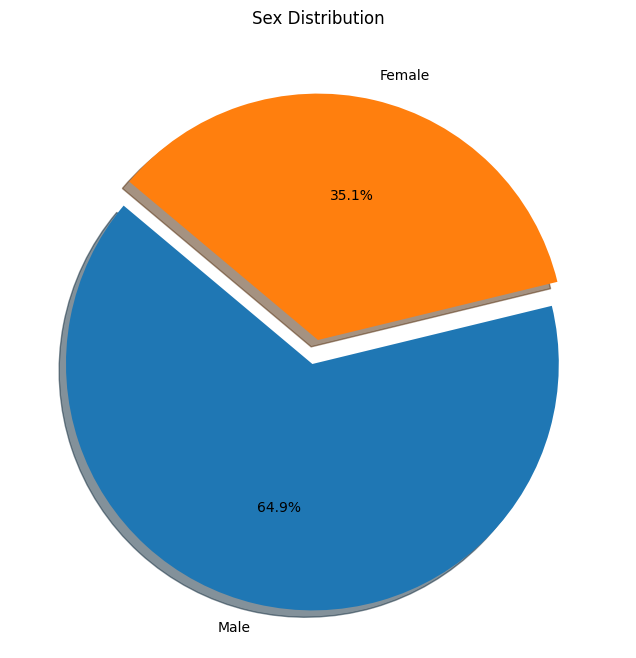

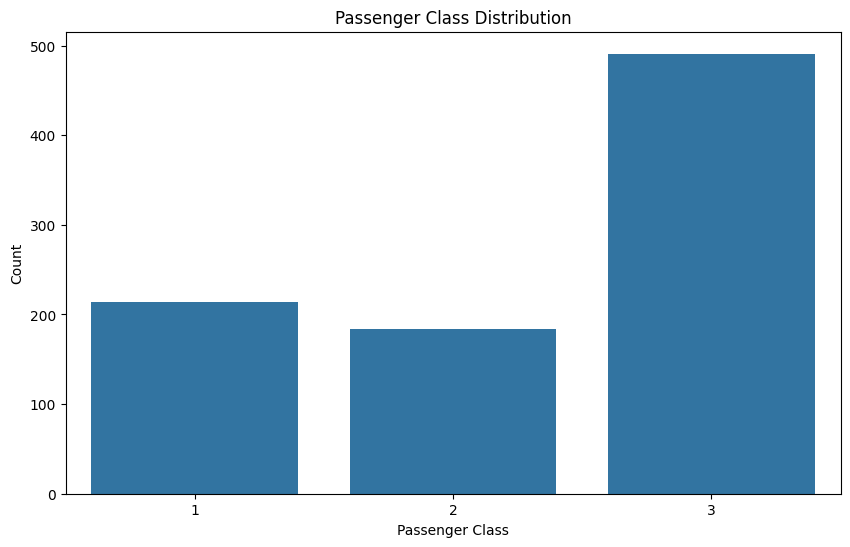

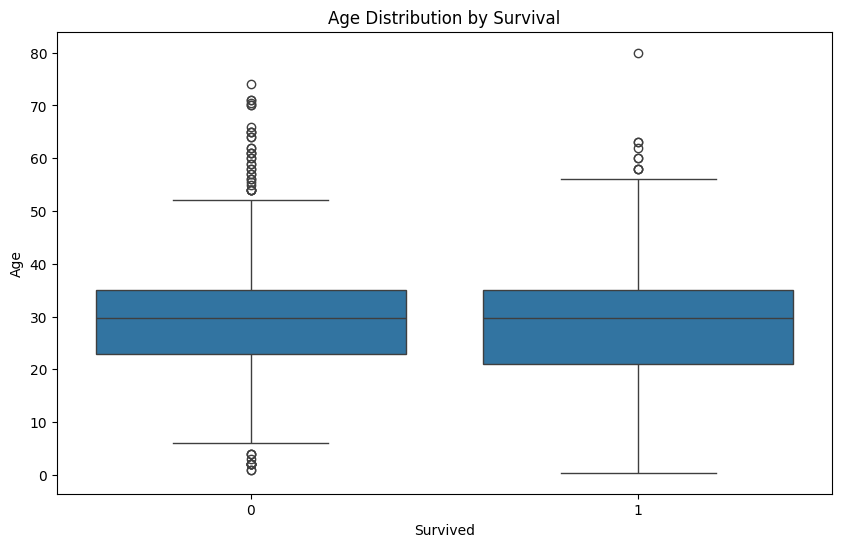

In [6]:
# Histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Pie chart for Sex distribution
labels = ['Male', 'Female']
sizes = df['Sex'].value_counts()
explode = (0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Sex Distribution')
plt.show()

# Bar plot for Pclass
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

# Box plot for Age by Survived
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()


In [7]:
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)


Null Hypothesis (H0): There is no difference in age between survivors and non-survivors.
Alternative Hypothesis (H1): There is a difference in age between survivors and non-survivors.

We'll use a two-sample t-test for this.

In [8]:
# Split data into two groups
survived = df[df['Survived'] == 1]['Age']
not_survived = df[df['Survived'] == 0]['Age']

# Perform t-test
t_stat, p_value = stats.ttest_ind(survived, not_survived)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Determine the result
alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")


T-statistic: -2.2301762037083717
P-value: 0.02598525724532422
We reject the null hypothesis.
